<h1>Содержание проекта<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Построение-модели-прогнозирования-оттока-клиентов" data-toc-modified-id="Построение-модели-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение модели прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Разбиение-данных-на-обучающую-и-валидационную-выборку" data-toc-modified-id="Разбиение-данных-на-обучающую-и-валидационную-выборку-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разбиение данных на обучающую и валидационную выборку</a></span></li><li><span><a href="#Обучение-модели-на-train-выборке-логистической-регрессией" data-toc-modified-id="Обучение-модели-на-train-выборке-логистической-регрессией-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение модели на train-выборке логистической регрессией</a></span></li><li><span><a href="#Обучение-модели-на-train-выборке-случайным-лесом." data-toc-modified-id="Обучение-модели-на-train-выборке-случайным-лесом.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Обучение модели на train-выборке случайным лесом.</a></span></li><li><span><a href="#Оценка-метрик-accuracy,-precision-и-recall" data-toc-modified-id="Оценка-метрик-accuracy,-precision-и-recall-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Оценка метрик accuracy, precision и recall</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизация-данных" data-toc-modified-id="Стандартизация-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Стандартизация данных</a></span></li><li><span><a href="#Построение-матрицы-расстояний-и-дендрограммы." data-toc-modified-id="Построение-матрицы-расстояний-и-дендрограммы.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Построение матрицы расстояний и дендрограммы.</a></span></li><li><span><a href="#Обучение-модели-кластеризации-на-основании-алгоритма-K-Means" data-toc-modified-id="Обучение-модели-кластеризации-на-основании-алгоритма-K-Means-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обучение модели кластеризации на основании алгоритма K-Means</a></span></li><li><span><a href="#Подсчет-доли-оттока-по-кластерам" data-toc-modified-id="Подсчет-доли-оттока-по-кластерам-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Подсчет доли оттока по кластерам</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Проект "Стратегия взаимодействия с клиентами на основе аналитических данных"

## Описание проекта

Аналитику предлагается набор данных от сети фитнес-клубов для разработки стратегии взаимодействия с клиентами. <br>
<b>Задача: </b>провести анализ и подготовить план действий по удержанию клиентов:<br>

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;<br>
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;<br>
- проанализировать основные признаки, наиболее сильно влияющие на отток;<br>
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:<br>
    1) выделить целевые группы клиентов;<br>
    2) предложить меры по снижению оттока;<br>
    3) определить другие особенности взаимодействия с клиентами.<br>

<b>Данные от заказчика - сети фитнес-клубов </b>, они содержат данные на месяц до оттока и факт оттока на определённый месяц. <br>

## Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier


In [2]:
#загружаю данные
gym_churn = pd.read_csv('/datasets/gym_churn.csv')
gym_churn

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [3]:
#смотрю общую информацию о датасете
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
#проверяю данные на пропуски
gym_churn.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [5]:
#проверяю данные на полные дубликаты
gym_churn.duplicated().sum()

0

In [6]:
#привожу названия столбцов к нижнему регистру 
gym_churn.columns = gym_churn.columns.str.lower()
gym_churn.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

In [7]:
gym_churn.shape

(4000, 14)

In [8]:
#проверю уникальные значения в столбцах, признаки которых определяются бинарно 
gym_churn['churn'].unique()

array([0, 1])

In [9]:
gym_churn['gender'].unique()

array([1, 0])

In [10]:
gym_churn['partner'].unique()

array([1, 0])

In [11]:
gym_churn['promo_friends'].unique()

array([1, 0])

In [12]:
gym_churn['phone'].unique()

array([0, 1])

In [13]:
gym_churn['group_visits'].unique()

array([1, 0])

В датасете 4000 наблюдений, нет пропусков и дубликатов. 14 полей: 13 признаков и 1 целевая переменная churn - факт оттока посетителей.

По большей части все признаки численные, но можно отметить, что признаки churn, gender, partner, promo_friends, phone, group_visits - категориальные, значения которых задаются бинарным кодом. 

## Исследовательский анализ данных (EDA)

In [14]:
#изучу средние значения и стандартные отклонения 
gym_churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Среднее значение для пола - 0,5 - это значит, что посетителей мужчин и женщин примерно поровну (стандартное отклонение 0,5 свидетельствует о том же)

Проживание или работа в районе, где находится ФЦ: среднее 0,84 - близко к 1, значит, большинство посетителей живут или работают неподалеку, это вполне логично, мало кто готов тратить дополнительное время, чтобы добираться до спортзала.

Partner - среднее 0,49 - значит, около половины посетителей приходят по программе лояльности от компании-партнера клуба. Сейчас многие работодатели оплачивают своим сотрудникам абонементы в фитнес-клубы, по данным видно, что работники этим успешно пользуются. 

Акция "Приведи друга" характеризуется средним 0,3 - по этой акции приходит около 30% всех посетителей. Думаю, это довольно-таки хороший показатель, почти треть всех посетителей. 

Телефон - среднее 0,9 - почти все посетители оставляют контактный телефон, значит, клуб может легко связаться с большинством из своих гостей. 

Длительность текущего действующего абонемента - среднее 4,68 месяцев, стандартное отклонение 4,54. Большинство выбирает между абонементами на 3 или 6 месяцев. Обычно у фитнес-клубов действуют акции на покупку абонемента сразу на несколько месяцев, должно быть, посетители этим пользуются.

Посещение групповых занятий - 0,41 - то есть около 40% посетителй было на групповых занятиях, но большинство предпочло индивидуальные тренировки

Средний возраст посетителей сети фитнес-центров - 29 лет, стандартное отклонение чуть больше 3 лет, то есть в основном покупают абонементы достаточно молодые люди, но в то же время, они уже в основном закончили учебу, работают и, следовательно, они более стабильны чем более молодые люди. Сдлеаю предположение, что у посетителей более старшего возраста уже больше дополнительных "обременений" - появляется семья, скорее всего уже нет много времени, чтобы ходить в спортзал. 

Среднее по суммарной выручке от доп услуг составило 146 (у.е.?), стандартное отклонение - 96, у некоторых посетителей доп траты доходили до 552. Можно сделать вывод о том, что посетители пользуются дополнительными услугами.

Срок до окончания действующего абонемента - среднее значение 4,3 месяца при стандартном отклонении до 4.2. Тут может быть вывод о том, что посетители либо недавно купили абонементы, либо хорошо следят за их сроком, обновляют и лояльны к клубу, увидим далее по целевой переменной churn

Время с момента первого обращения в фитнес-центр: в среднем 3,7 месяцев со стандартным отклонением 3,7. Тут уже начинает прорисовываться, что посетители в большинстве своем не так-то и лояльны к посещению спортзала. В среднем всего чуть больше 3,5 месяцев, как они купили первый абонемент, а срок до его окончания в среднем - 4,3, получается, что у большинства куплены абонементы на 6 месяцев, причем пришли эти посетители не так давно. Можно было бы предположить, что это новый фитнес-центр, но мы видим, что максимальное значение в этой колонке - 51 месяц, то есть кто-то уже более 4 лет посещает данный спортклуб. 

Средняя частота посещений в неделю (за все время) - 1.87, за последний месяц - 1.76 - менее двух раз в неделю, это не очень много. 

Отток - средний 0,26 со стандартным отклонением 0,44. Получается, что в среднем за последний месяц клуб потерял почти четверть своих клиентов, которые ранее купили абонемент, достаточно большая доля. 


У переменных довольно разные по величине стандартные отклонения. Это говорит о том, что их нужно стандартизировать перед обучением.

In [15]:
#смотрю средние значения для признаков при разделении на группы с оттоков и без 
gym_churn.groupby('churn').agg({'gender': 'mean', 'near_location': 'mean', 'partner': 'mean', 'promo_friends': 'mean',\
                                'phone': 'mean', 'contract_period': 'mean', 'group_visits': 'mean', 'age': 'mean', \
                                'avg_additional_charges_total': 'mean', 'month_to_end_contract': 'mean', \
                               'lifetime': 'mean', 'avg_class_frequency_total': 'mean', 'avg_class_frequency_current_month': 'mean', \
                               })

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Из сильно отличающихся признаков у групп: 

Среднее по приходу в клуб через акцию приведи друга - у тех, кто остался в 2 раза больше, чем у тех, кто ушел.

Длительность текущего действующего абонемента - у тех, кто ушел почти 2 месяца, у оставшихся - почти 6. Дата до окончания контракта - более 5 мес у оставшихся и примерно 1,5 у группы оттока. Оставшаяся группа покупала абонементы на более длительные сроки.

Из оставшихся посещали групповые занятия 46%, из ушедших - 27.

Средний возраст оставшихся на 3 года больше, чем у группы оттока.

Оставшиеся тратили в среднем чуть больше. Время с момента первого обращения гораздо больше у оставшихся - почти 5 месяцев они с клубом, а ушедшие были всего месяц. 

Оставшиеся в клубе посещают тренировки чуть чаще - более 2 раз в неделю в среднем за все время и за полседний месяц, тогда как у тех, кто ушел, почти 1,5 раза и 1 раз, соответственно. 

Т.о. оставшаяся группа по большинству признаков превосходит посетителей из группы оттока. 

In [16]:
#разделю датафрейм на две таблицы для построения гистрограм 
gym_churn_one = gym_churn.query('churn == 1')
gym_churn_one

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,1,1,0,0,1,1,0,24,135.395712,1.0,0,1.390251,0.789321,1
3984,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915,1
3986,0,1,1,1,1,1,1,34,226.804845,1.0,0,1.399529,0.304130,1
3994,1,1,0,0,1,1,0,26,31.066721,1.0,1,1.157451,0.269597,1


In [17]:
gym_churn_null = gym_churn.query('churn == 0')
gym_churn_null

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0,1,1,0,1,1,0,33,231.778628,1.0,3,1.418791,1.450442,0
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


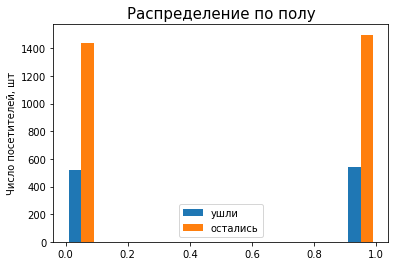

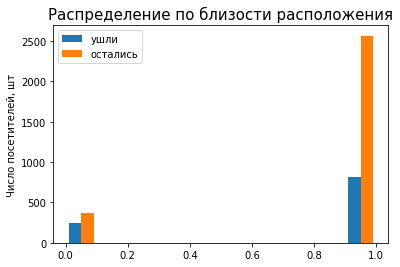

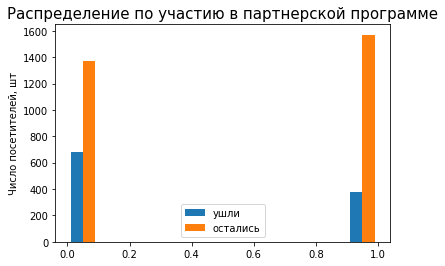

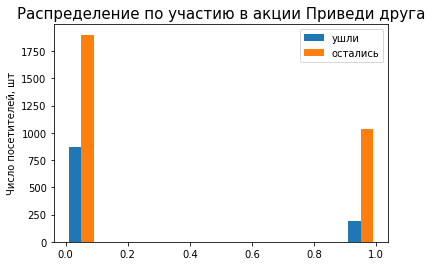

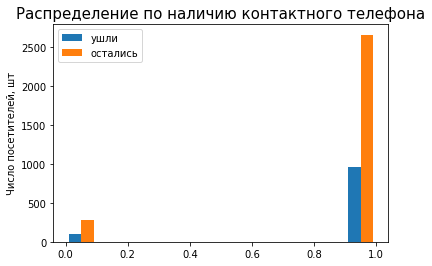

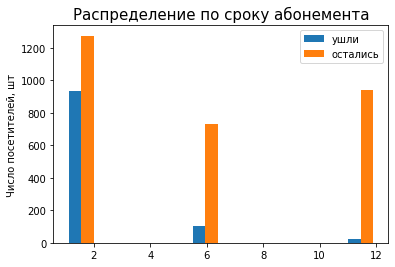

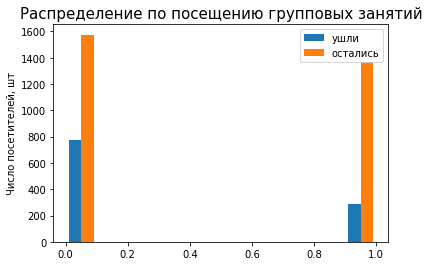

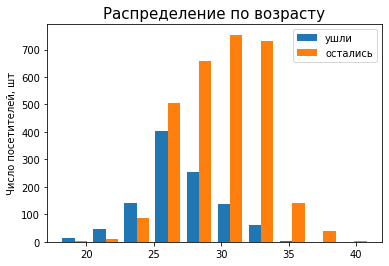

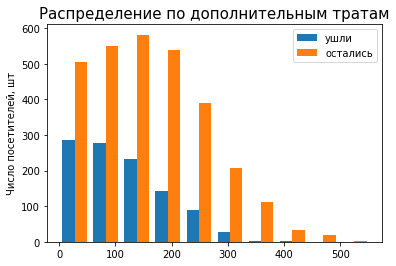

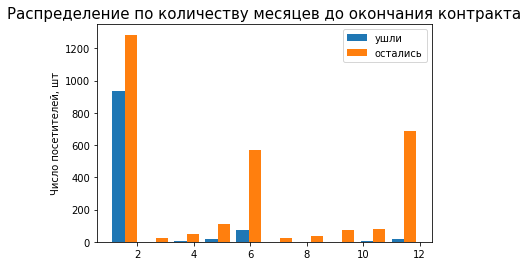

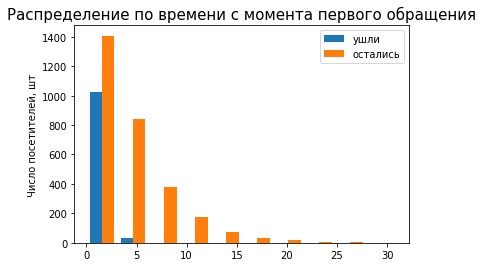

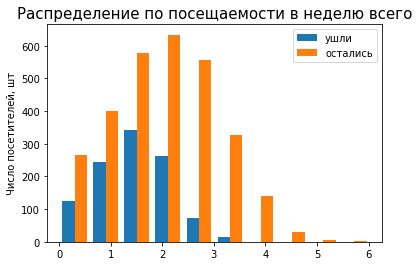

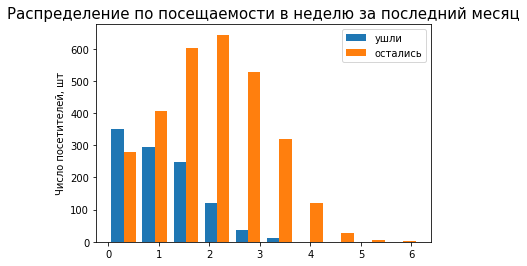

In [18]:
#задам функцию для отрисовки гистограм, чтоб увидеть распределение признаков в группах оставшихся посетителей и ушедших
def hists(col_one, col_null):
    plt.hist([col_one, col_null], bins = 10, label=['ушли', 'остались'])  
    plt.legend()
    plt.ylabel('Число посетителей, шт', fontsize = 10)
    plt.show()

#рисую гистограммы для каждого признака
plt.title('Распределение по полу', fontsize = 15)
hists(gym_churn_one['gender'], gym_churn_null['gender'])
plt.title('Распределение по близости расположения', fontsize = 15)
hists(gym_churn_one['near_location'], gym_churn_null['near_location'])
plt.title('Распределение по участию в партнерской программе', fontsize = 15)
hists(gym_churn_one['partner'], gym_churn_null['partner'])
plt.title('Распределение по участию в акции Приведи друга', fontsize = 15)
hists(gym_churn_one['promo_friends'], gym_churn_null['promo_friends'])
plt.title('Распределение по наличию контактного телефона', fontsize = 15)
hists(gym_churn_one['phone'], gym_churn_null['phone'])
plt.title('Распределение по сроку абонемента', fontsize = 15)
hists(gym_churn_one['contract_period'], gym_churn_null['contract_period'])
plt.title('Распределение по посещению групповых занятий', fontsize = 15)
hists(gym_churn_one['group_visits'], gym_churn_null['group_visits'])
plt.title('Распределение по возрасту', fontsize = 15)
hists(gym_churn_one['age'], gym_churn_null['age'])
plt.title('Распределение по дополнительным тратам', fontsize = 15)
hists(gym_churn_one['avg_additional_charges_total'], gym_churn_null['avg_additional_charges_total'])
plt.title('Распределение по количеству месяцев до окончания контракта', fontsize = 15)
hists(gym_churn_one['month_to_end_contract'], gym_churn_null['month_to_end_contract'])
plt.title('Распределение по времени с момента первого обращения', fontsize = 15)
hists(gym_churn_one['lifetime'], gym_churn_null['lifetime'])
plt.title('Распределение по посещаемости в неделю всего', fontsize = 15)
hists(gym_churn_one['avg_class_frequency_total'], gym_churn_null['avg_class_frequency_total'])
plt.title('Распределение по посещаемости в неделю за последний месяц', fontsize = 15)
hists(gym_churn_one['avg_class_frequency_current_month'], gym_churn_null['avg_class_frequency_current_month'])


Гистограммы подтверждают ранее сделанные выводы по вычислению средних показателей признаков. 

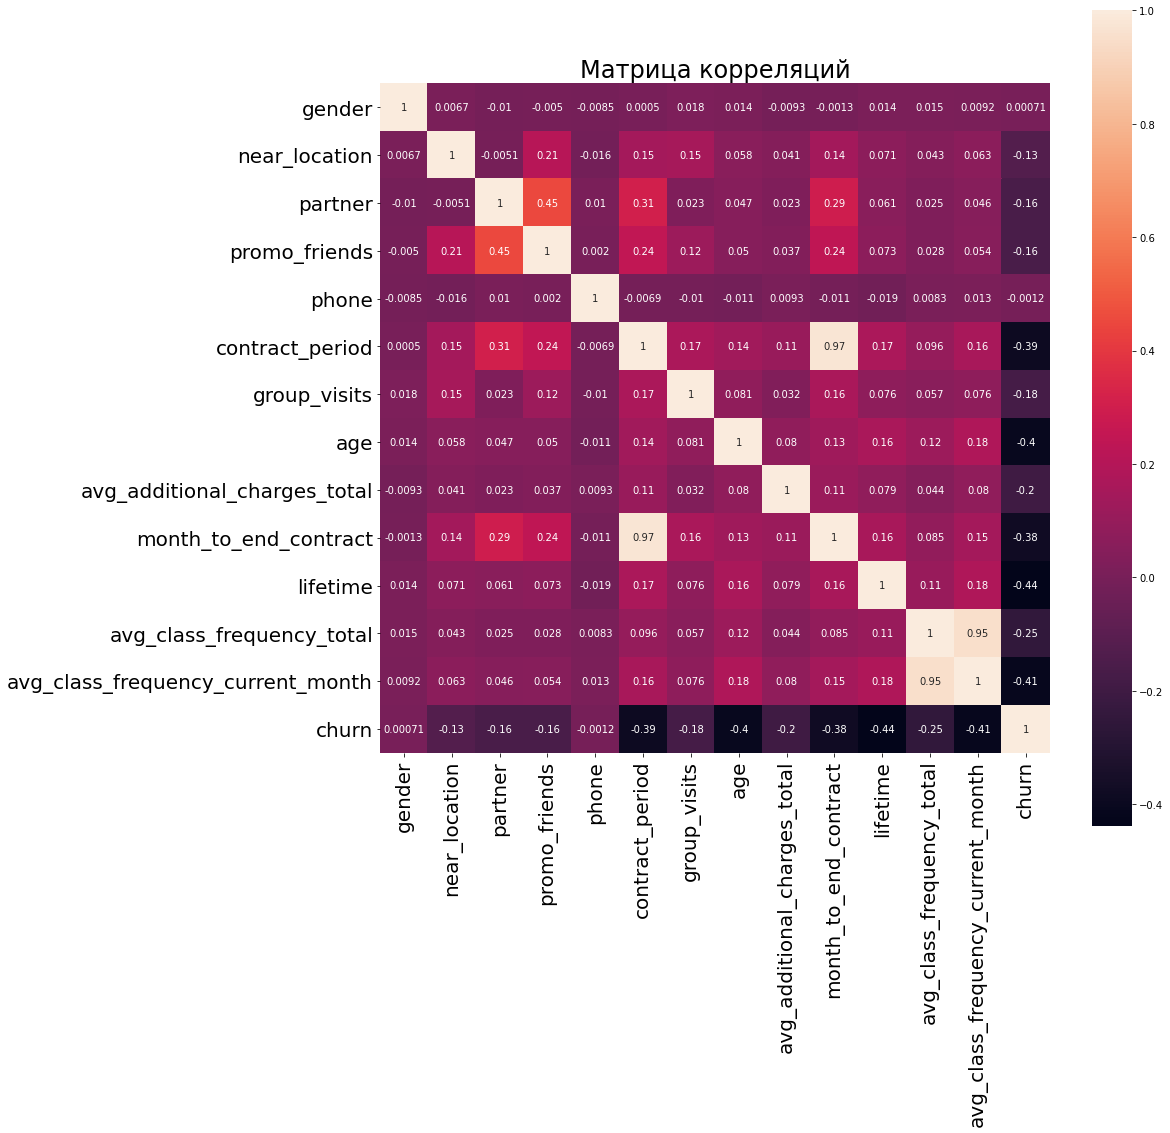

In [19]:
#вычисляю матрицу корреляций 
cm = gym_churn.corr()

#строю тепловую карту корреляций признаков
plt.figure(figsize = (15,15))
plt.title('Матрица корреляций', fontsize = 24)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
sns.heatmap(cm, square = True, annot = True)
plt.show()

В основном зависимостей признаков не наблюдается, но есть и интересные пары: 

Самая сильная корреляция между признаками срок до конца абонемента и и длительность текущего абонемента, а также у признаков посещаемости за последний месяц и посещаемости всего, эти зависимости стремятся к единице, и действительно, эти признаки зависят друг от друга, таким образом, подтверждаются ранее сформированные выводы, когда были рассматрены средние значения и стандартные отклонения. 

Пока что нельзя говорить о сильной корреляции признаков с целевой переменной. Но можно отметить, что признаки Длительность текущего контракта, Возраст, Время с момента первого обращения и Посещаемость за последний месяц коррелируют с целевой переменной сильнее остальных. 

## Построение модели прогнозирования оттока клиентов

In [20]:
#проведу преобразование призаков функцией get_dummies
gym_churn = pd.get_dummies(gym_churn) 
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

ничего не изменилось

### Разбиение данных на обучающую и валидационную выборку

In [21]:
#разобью данные на обучающую и валидационную выборку случайным образом, так как можно пренебречь влиянием соседних наблюдений друг на друга
#разделяю данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop(columns=['churn'], axis = 1)
y = gym_churn['churn']

# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

### Обучение модели на train-выборке логистической регрессией

In [22]:
#задаю алгоритм для модели
model = LogisticRegression(solver='lbfgs', max_iter=700) 

#обучаю модель
model.fit(X_train, y_train)

#делаю прогнозы, пользуясь моделью
predictions = model.predict(X_test) 
probabilities = model.predict_proba(X_test)[:,1]


### Обучение модели на train-выборке случайным лесом.

In [23]:
#задаю алгоритм для модели на основе алгоритма решающего дерева
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

#обучаю модель
rf_model.fit(X_train, y_train)
#делаю прогнозы, пользуясь моделью
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

### Оценка метрик accuracy, precision и recall

In [24]:
print('Метрики для логистической регрессии')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))


Метрики для логистической регрессии
Accuracy: 0.93
Precision: 0.89
Recall: 0.85


In [25]:
print('Метрики для случайного леса')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))


Метрики для случайного леса
Accuracy: 0.92
Precision: 0.88
Recall: 0.83


Доля правильных ответов, полноста и точность чуть лучше у модели логистической регрессии, выходит, в данном случае при рассмотрании двух моделей логистическая регрессия немного качественней, но, в целом, разница в сотых, наверное не очень критична. 



## Кластеризация клиентов

### Стандартизация данных

In [26]:
#стандартизирую данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Построение матрицы расстояний и дендрограммы.

In [27]:
#построение матрицы расстояний на стандартизованной матрице признаков
linked = linkage(X_sc, method = 'ward') 

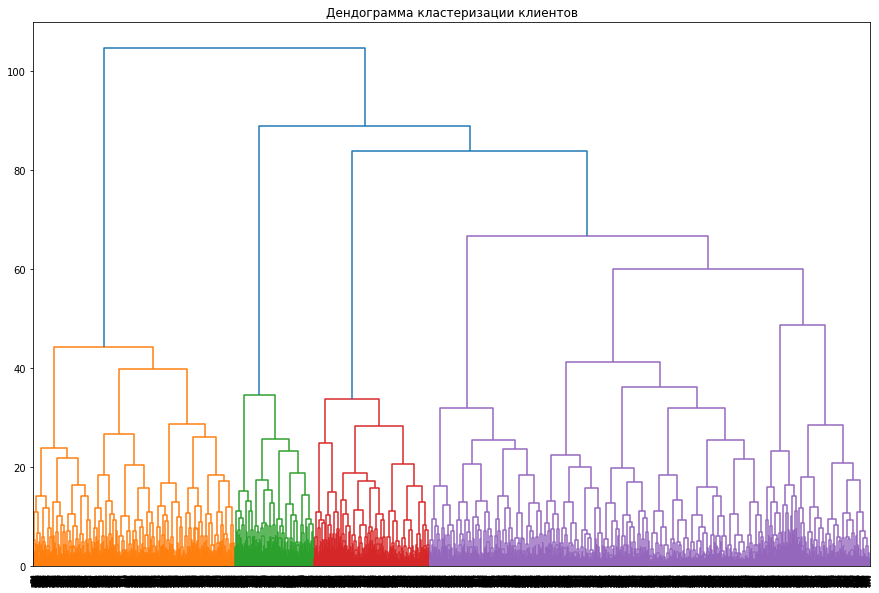

In [28]:
#рисую дендограмму 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендограмма кластеризации клиентов')
plt.show() 

По результатам анализа можно разбить клиентов фитнес-клуба на 4 кластера. (4 цвета на графике)

### Обучение модели кластеризации на основании алгоритма K-Means 

In [29]:
#функция отрисовки графиков попарных признаков для кластеров
# def show_clusters_on_plot(gym_churn, x_name, y_name, cluster_name):
#     plt.figure(figsize=(7, 7))
#     sns.scatterplot(
#         gym_churn[x_name], gym_churn[y_name], hue=gym_churn[cluster_name], palette='Paired'
#     )
#     plt.title('{} vs {}'.format(x_name, y_name))
#     plt.legend()
#     plt.show()
    
def show_clusters_on_countplot(gym_churn, x_name, cluster_name):
    plt.figure(figsize=(7, 7))
    sns.countplot(
        data = gym_churn, x = x_name, hue = cluster_name, palette='Paired'
    )
    plt.title('{}'.format(x_name))
    plt.legend()
    plt.show()    
    
def show_clusters_on_boxplot(gym_churn, y_name, cluster_name):
    plt.figure(figsize=(7, 7))
    sns.boxplot(
        x =cluster_name,y = y_name, data = gym_churn, palette='Paired'
    )
    plt.title('{}'.format(y_name))
    plt.show()    


#стандартизация данных данные
sc = StandardScaler()
x_sc = sc.fit_transform(X)

#задаю модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

#прогнозирую кластеры для наблюдений 
labels = km.fit_predict(x_sc)

#сохраняю метки кластера в поле нашего датасета
gym_churn['cluster_km'] = labels

#вывожу средние значения признаков для кластеров
gym_churn.groupby(['cluster_km']).mean()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Можно отметить, что по полу кластеры разделены равномерно, в 1 и 5 кластере больше клиентов, у которых близко дом или работа к клубу, по партнерской программе и программе Приведи друга кластеры разделены по увеличению числа клиентов, использующих программы, во 2 кластер попали посетители, которые не оставили контактный номер телефона, по периоду действия абонемента в 1 кластере посетители, которые выбрали годовой абонемент, в остальных - абонементы с меньшим числом месяцев, примерно одинаковое разбиение на кластеры по посещению групповых занятий - почти половина пользователей, только в третьем - около 22%, по возрасту кластеры распределились равномерно, по дополнительным тратам тоже. Срок до окончания абонемента больше всего в 1 кластере (ранее было отмечено, что там пользователи приобретают абонементы большей длительтности), при грубой оценке можно сказать, что среднее время с момента первого обращения у пользователей в кластерах одинаковое, по посещаемости в неделю за все время и за последний месяц выделяется пятый кластер, в нем наиболее активные посетители - 2.8 раза в среднем. Наибольший отток наблюдается в четвертом кластере - более 50% посетителей, пользователи этого кластера хуже всех посещают занятия, у них меньше всего времени с момента первого обращени в клуб, а также они меньше всего совершали дополнительных покупок (по сумме), они самые молодые по среднему значению в кластерах, и как раз они (как было отмечено выше) меньше всего посещали групповые занятия и пользовались реферальными программами. Сделующий по оттоку и по схожим показателям - 3 кластер - около 44%


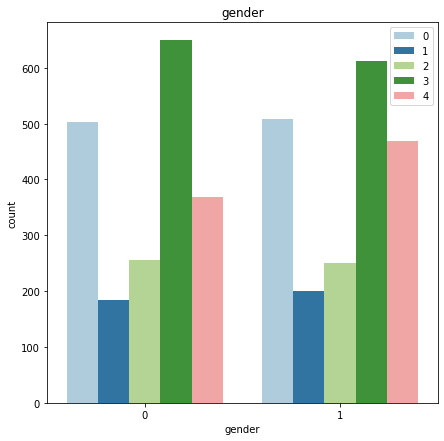

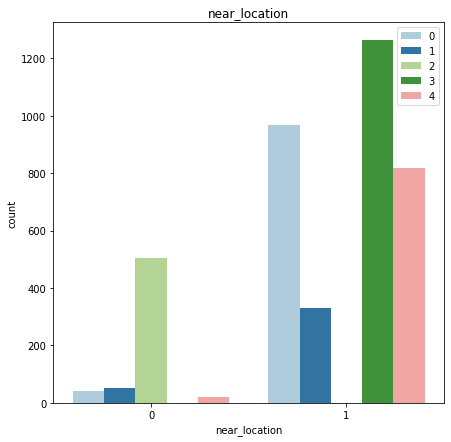

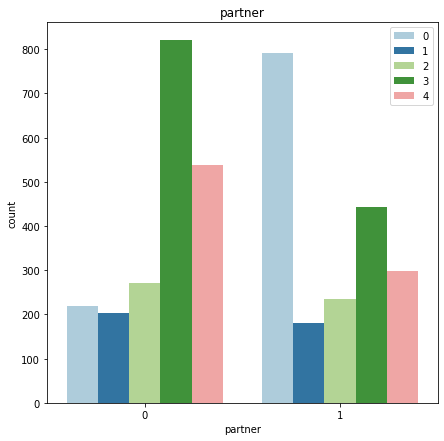

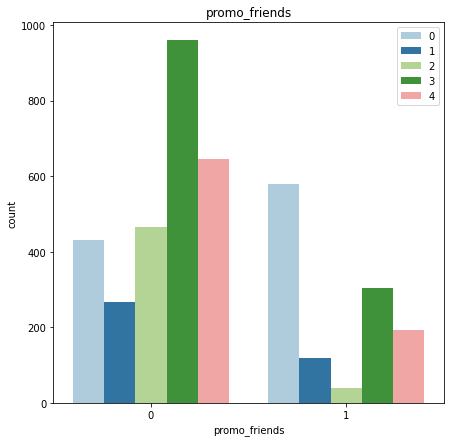

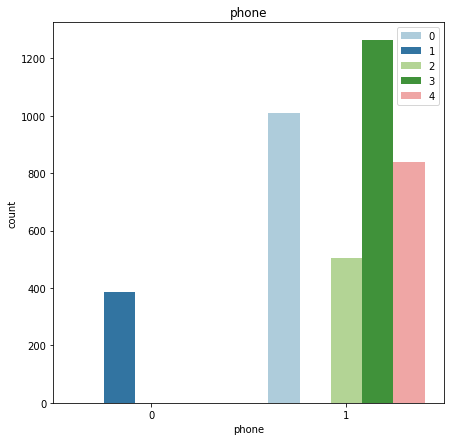

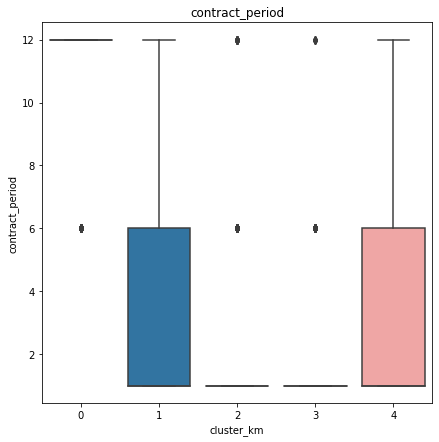

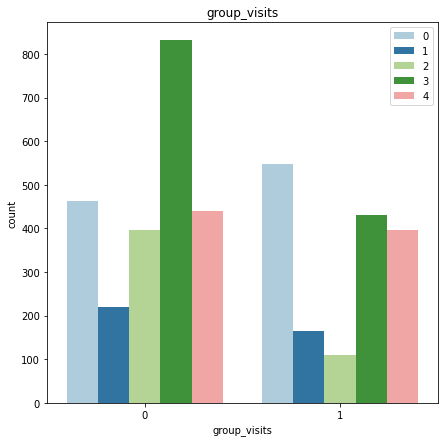

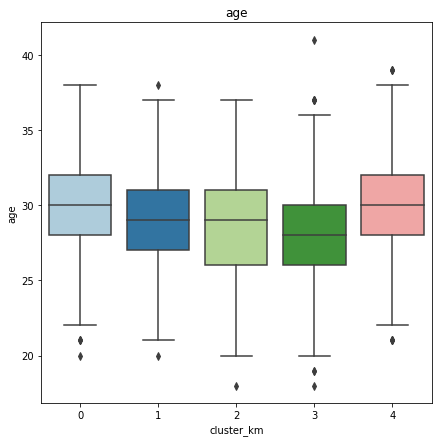

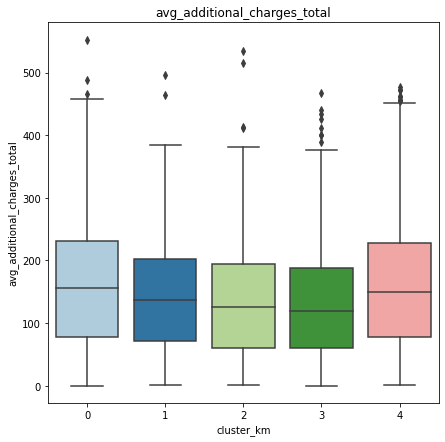

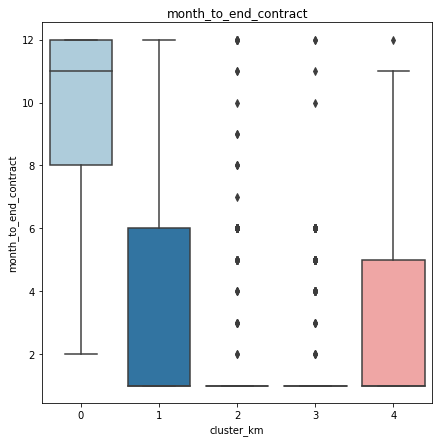

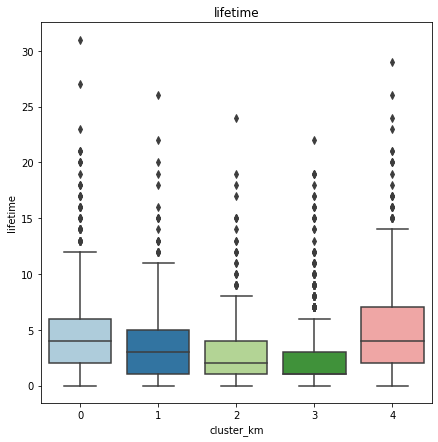

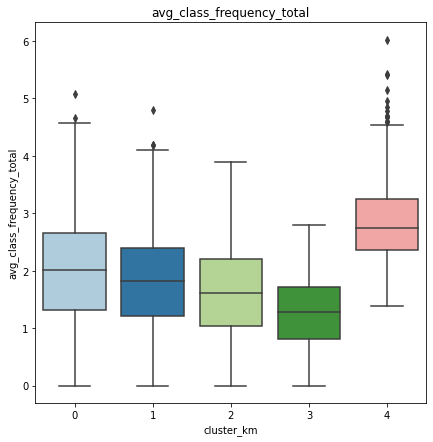

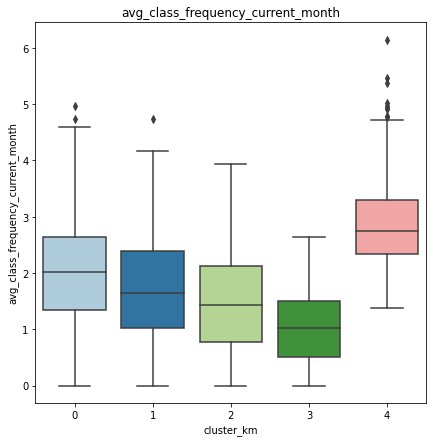

In [30]:
#рисую попарные графики
show_clusters_on_countplot(gym_churn, 'gender', 'cluster_km')
show_clusters_on_countplot(gym_churn, 'near_location', 'cluster_km')
show_clusters_on_countplot(gym_churn, 'partner', 'cluster_km')
show_clusters_on_countplot(gym_churn, 'promo_friends', 'cluster_km')
show_clusters_on_countplot(gym_churn, 'phone', 'cluster_km')
show_clusters_on_boxplot(gym_churn, 'contract_period', 'cluster_km')
show_clusters_on_countplot(gym_churn, 'group_visits', 'cluster_km')
show_clusters_on_boxplot(gym_churn, 'age', 'cluster_km')
show_clusters_on_boxplot(gym_churn, 'avg_additional_charges_total', 'cluster_km')
show_clusters_on_boxplot(gym_churn, 'month_to_end_contract', 'cluster_km')
show_clusters_on_boxplot(gym_churn, 'lifetime', 'cluster_km')
show_clusters_on_boxplot(gym_churn, 'avg_class_frequency_total', 'cluster_km')
show_clusters_on_boxplot(gym_churn, 'avg_class_frequency_current_month', 'cluster_km')
 


Вывела распределение признаков по кластерам на графиках, они достаточно информативно отобразили выводы, полученные ранее

### Подсчет доли оттока по кластерам

In [31]:
gym_churn.groupby('cluster_km').agg({'churn': 'mean'}).round(2)

,churn
cluster_km,
0,0.03
1,0.27
2,0.44
3,0.51
4,0.07


In [32]:
gym_churn.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Кластеры отличаются по средней доле оттока, но эта доля не превосходит 51%. Если два кластера с минимальным оттоков - 0.03 и 0.07 - они наиболее надежные, кластеры с оттоков 51% и 44% представляются самыми ненадежными.

## Вывод

В данном исследовании был проведен анализ активности посетилелей фитнес-клуба по нескольким признакам, были сформированы портреты пользователей и проведено разбиение пользователей на группы, в соответствие с которыми предлагается ряд рекомендаций. 

Исходя из проведенного анализа и построенной дендограммы было видно, что данные можно разбить на 4 кластера, но из-за специфики задания было выделено 5 кластеров. 

Два кластера характеризуются низкой долей оттока, два - средней, один - наибольшей для рассматриваемых данных. 
Признаки, по которым отличаются эти кластеры: 
* В кластерах с наименьшей долей оттока была отмечена наибольшая средняя посещаемость в неделю за весь период и за последний месяц, а также наибольшее время, прошедшее с момента первого обращения. Это логичное наблюдение, но повлиять на него отдельно трудно, это зависит непосредственно от клиентов. 
* Отмечается, что в кластере с большим процентом оттока наиболее молодые посетители, правда нельзя гвоорить о сильной разнице в возрасте, речь идет о 28-30 годах (это средний возраст посетителей по всему датасету). Также к признакам, не особо влияющим на целевую переменную можно отнести пол и наличие контактного номера телефона.
* Можно подчеркнуть тот факт, что кластер с наибольшим процентом оттока клиентов характеризуется наибольшей отдаленностью их дома или работы от места расположения фитнес-центра. Это важный показатель, получается, что подтверждается вывод о том, что удаленность центра от привычной локации играет роль. 
* Помимо локации можно отметить, что среди тех, кто перестал ходить в зал, малое число пользователей реферальных программ: партнерской и Приведи друга (хотя кластер с долей оттока 0.08 тоже характеризуется так же, что не мешает этим клиентам оставаться в фитнес-клубе)
* Из выделяющихся признаков: участие в групповых занятиях, явно можно отметить, что те, кто не любят посещать групповые занятия, наиболее склонны к оттоку, а также эти люди покупали абонементы на самое меньшее число месяцев, скорее всего они брали пробный период - абонемент на месяц (максимум на 3), не замахивафсь на полугодовые и годовые абонементы. 

Таким образом, можно отметить, что для удержания клиентов стоит привлекать тех, кто живет или работает рядом, нужно развивать партнерские и дружественные программы и продвигать среди посетителей посещение групповых занятий. 


<b>Предложение маркетинговых действий: </b>

Фитнес-клубу можно расширять число своих посетителей путем создания так называемого "Цифрового двойника" - в данном случае вести актвино социальные сети, правильно настраивать таргетированную рекламу: после проведени исследования мы видим, что важен возраст посетителей, их географическое положение, нужен грамотный специалист по таргету. Думаю, что сейчас без ведения инстаграма мало какому бизнесу удается сохранять и увеличивать свою аудиторию. После этого можно добавить для наблюдения параметр, кто пришел из социальных сетей, наблюдать их процент притока-оттока. 

Так как была выявлена важность посещения групповых занятий, нужно дать посетителям возможность попробовать себя в этих тренировках: в том же инстаграме показывать занятия, вешать плашку с онлайн-записью на тренировки, ведь сейчас люди стараются в основном не звонить, а записываться онлайн. 

Если идти дальше, можно разработать приложение, где клиенты всегда могут хранить свои абонементы и не бояться забыть карточку. Так же подключить уведомления об акциях и там же сделать онайлн запись. 

В приложении можно сделать как бесплатный - единый для всех контент, так и сделат ьплатный, например, с тренером онлайн или с отслеживанием питания тоже тренером. 

## Чек-лист готовности проекта

- [x] Загрузите и изучите данные
- [x] Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());
- [x] Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());
- [x] Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);
- [x] Постройте матрицу корреляций и отобразите её.
- [x] Разбейте данные на обучающую и валидационную выборку функцией train_test_split()
- [x] Обучите модель на train-выборке логистической регрессией,
- [x] Обучите модель на train-выборке случайным лесом.
- [x] Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?
- [x] Стандартизируйте данные.
- [x] Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму.
- [x] На основании полученного графика предположите, какое количество кластеров можно выделить.
- [x] Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. 
- [x] Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?
- [x] Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?
- [x] Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?
- [x] Сформулируйте основные выводы и предложите рекомендации для стратегии взаимодействия с клиентами и их удержания.

